In [1]:
import sys
sys.path.append('../')

from envs.GridMaps import maze5x5_withX, maze14x14_withX
from utilities.transitionDatasetGeneration import *

In [9]:
train = True

shape = "14x14"

if shape == "5x5":
    maze = maze5x5_withX
    n_models = 9
    n_epochs = 5000
elif shape == "14x14":
    maze = maze14x14_withX
    n_models = 11
    n_epochs = 7000

In [10]:
all_transitions = transition_generator(maze)
new_transitions = transitions_families_generator_FULLY_REPRESENTED(all_transitions, n_models)
#count_original_transitions(all_transitions, new_transitions)

In [11]:
if train:
    models_arr = []

    for i in range(len(new_transitions)):
        model = ModelTrainer(i, shape, new_transitions[i], n_epochs)

        print("Training model", i + 1, "/", n_models, "...")
        model.train(test_size=0.05)

        models_arr.append(model)

Training model 1 / 11 ...
Trained successfully!
Final loss: 0.03804118558764458

Training model 2 / 11 ...
Trained successfully!
Final loss: 0.061333220452070236

Training model 3 / 11 ...
Trained successfully!
Final loss: 0.07251810282468796

Training model 4 / 11 ...
Trained successfully!
Final loss: 0.05599246919155121

Training model 5 / 11 ...
Trained successfully!
Final loss: 0.05151844024658203

Training model 6 / 11 ...
Trained successfully!
Final loss: 0.0670260563492775

Training model 7 / 11 ...
Trained successfully!
Final loss: 0.0427941158413887

Training model 8 / 11 ...
Trained successfully!
Final loss: 0.06325246393680573

Training model 9 / 11 ...
Trained successfully!
Final loss: 0.0608738549053669

Training model 10 / 11 ...
Trained successfully!
Final loss: 0.049401864409446716

Training model 11 / 11 ...
Trained successfully!
Final loss: 0.04257829487323761



In [12]:
#for model in models_arr:
    #model.test_loss()
    #model.show_loss()

In [13]:
#For a given state, predict the output for each action from the 9 models through polling.
#The possible states are sorted by their probability of being the next state, from highest to lowest
#model_tester([3,0], models_arr)

In [14]:
#model_tester_output_txt(maze, models_arr)

Loading models...
Models loaded


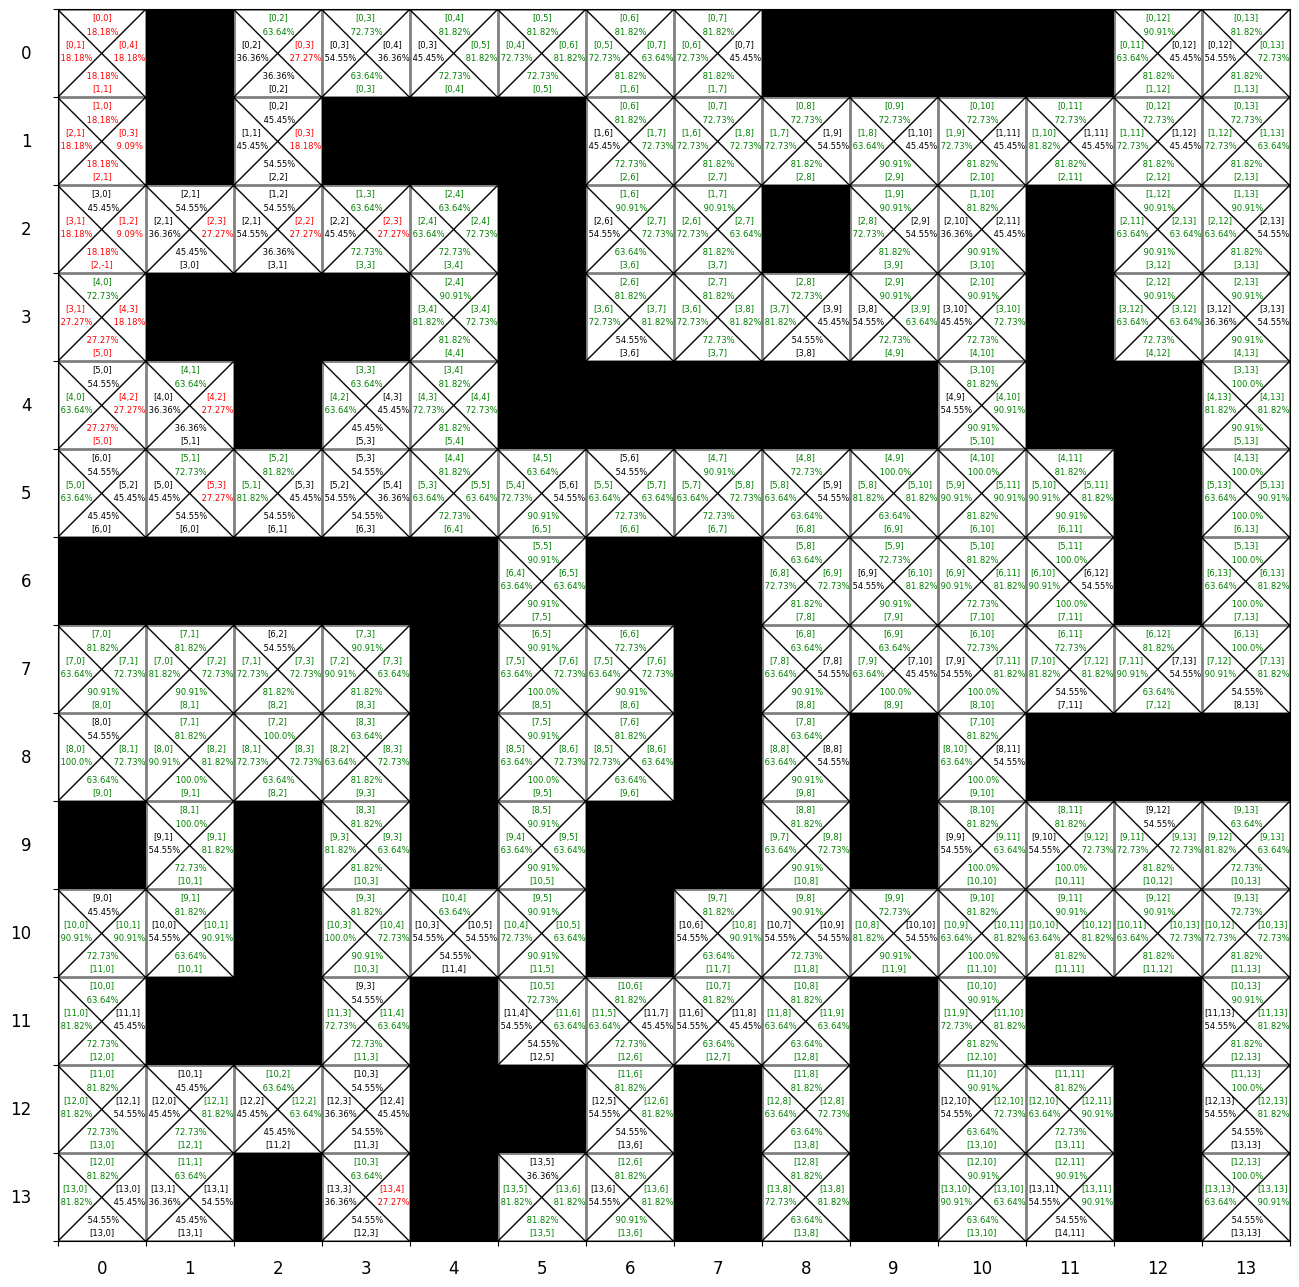

In [15]:
probMapper(maze, n_models)